In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Fix seed for reproducibility
np.random.seed(0)
# Number of points
n = 500

# Inner circle
r_inner = 0.5
theta_inner = 2 * np.pi * np.random.rand(n//2)
X_inner = np.c_[
    r_inner * np.cos(theta_inner),
    r_inner * np.sin(theta_inner)
]
y_inner = -np.ones(n//2)

# Outer circle
r_outer = 1.0
theta_outer = 2 * np.pi * np.random.rand(n//2)
X_outer = np.c_[
    r_outer * np.cos(theta_outer),
    r_outer * np.sin(theta_outer)
]
y_outer = np.ones(n//2)

# Combine
X = np.vstack((X_inner, X_outer))
y = np.hstack((y_inner, y_outer))

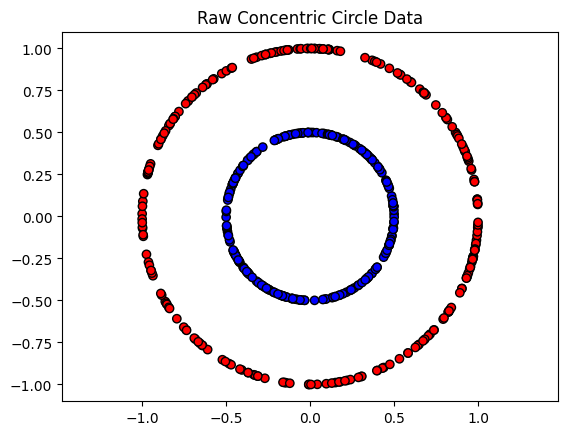

In [12]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
plt.axis('equal')
plt.title("Raw Concentric Circle Data")
plt.show()

In [13]:
def rbf_kernel(x, xi, gamma):
    return np.exp(-gamma * np.linalg.norm(x - xi)**2)

In [14]:
gamma = 50
alpha = 1

sv = X[0]
sv_label = y[0]

def decision_one_sv(x):
    return alpha * sv_label * rbf_kernel(x, sv, gamma)

In [15]:
r = np.linalg.norm(X, axis=1)
r_mid = (r.min() + r.max()) / 2

support_mask = np.abs(r - r_mid) < 0.2
support_vectors = X[support_mask]
support_labels = y[support_mask]

alpha = 1 / len(support_vectors)

ZeroDivisionError: division by zero

In [16]:
def decision_function(x):
    total = 0
    for sv, label in zip(support_vectors, support_labels):
        total += alpha * label * rbf_kernel(x, sv, gamma)
    return total

In [17]:
# Create grid
xx, yy = np.meshgrid(
    np.linspace(-1.5, 1.5, 400),
    np.linspace(-1.5, 1.5, 400)
)

Z = np.zeros(xx.shape)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        Z[i, j] = decision_function(np.array([xx[i, j], yy[i, j]]))

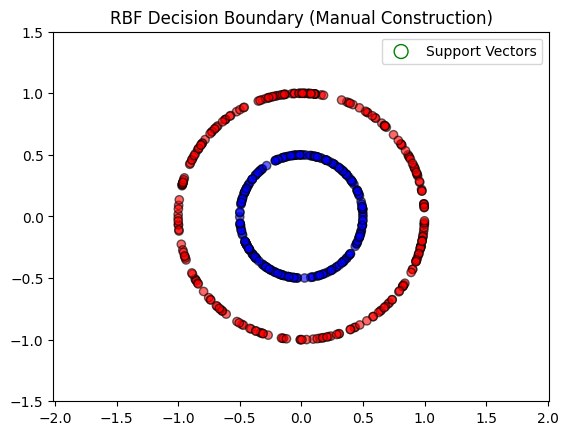

In [18]:
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k', alpha=0.6)
plt.scatter(support_vectors[:,0], support_vectors[:,1],
            facecolors='none', edgecolors='green', s=100, label="Support Vectors")
plt.legend()
plt.axis('equal')
plt.title("RBF Decision Boundary (Manual Construction)")
plt.show()
